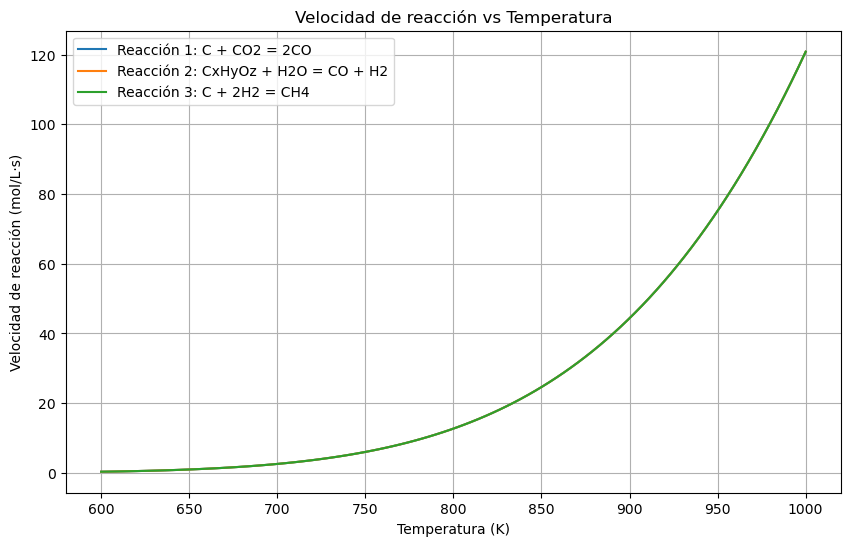

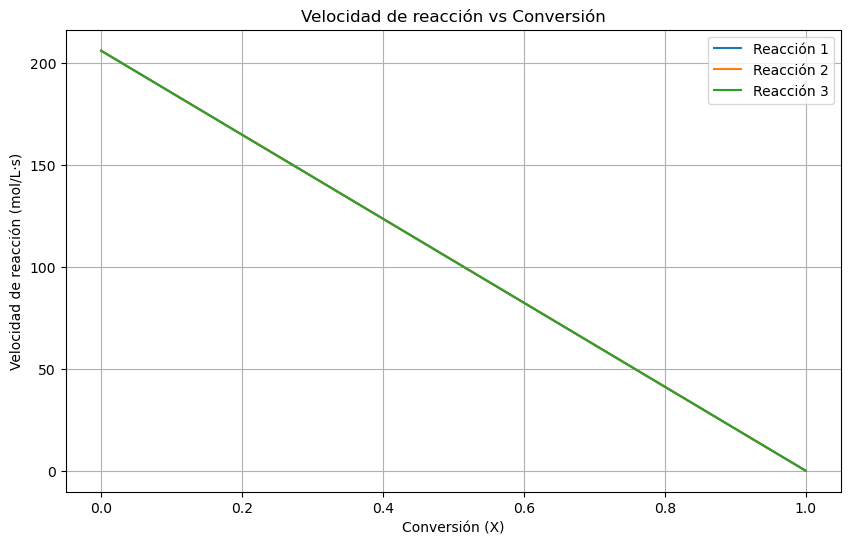

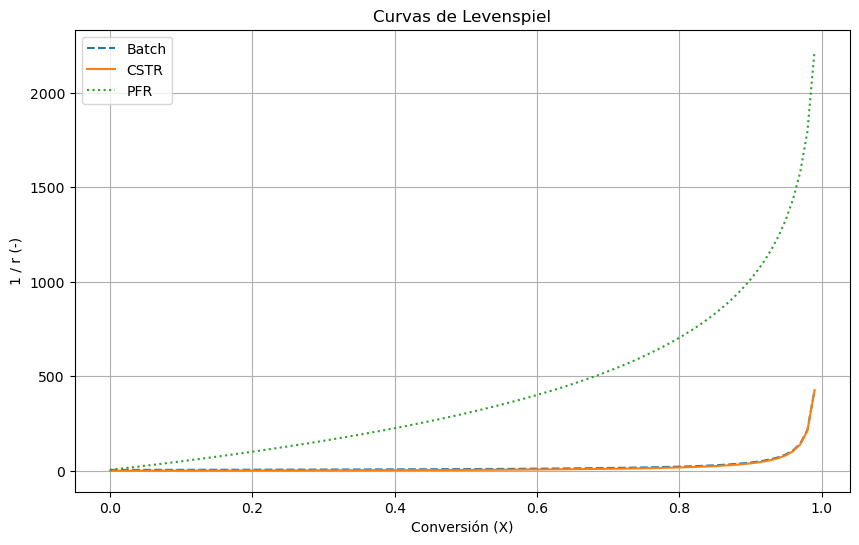

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes y parámetros iniciales
R = 8.314  # Constante de gases ideales (J/mol·K)
P = 1  # Presión en atm
T_range = np.linspace(600, 1000, 100)  # Rango de temperaturas (K)
F_vol = 20000  # Flujo volumétrico en L/s
F_in = F_vol / 22.4  # Flujo molar en mol/s (asumiendo gas ideal)

# Condiciones iniciales
O2_0 = 0.0422  # mol/L
CxHyOz_0 = 34.453  # mol/L

# Energías libres de formación (J/mol)
delta_G_C = 0
delta_G_CO2 = -394400
delta_G_CO = -137168
delta_G_H2O = -237140
delta_G_H2 = 0
delta_G_CH4 = -74873

# Energías de activación (J/mol)
Ea_reactions = [75000, 80000, 90000]  # Ejemplo para las tres reacciones

# Constantes de velocidad en función de la temperatura
def k_forward(T, Ea):
    return 1e6 * np.exp(-Ea / (R * T))

# Tasa de reacción generalizada
def rate(C, T, Ea):
    C_C, C_CO2, C_CO, C_H2O, C_H2, C_CH4 = C
    k = k_forward(T, Ea)
    r1 = k * C_C * C_CO2  # Para C + CO2 = 2CO
    r2 = k * C_C * C_H2O  # Para CxHyOz + H2O = CO + H2
    r3 = k * C_C * C_H2  # Para C + 2H2 = CH4
    return r1, r2, r3

# Graficar velocidad de reacción vs temperatura
reaction_rates = []
for T in T_range:
    r = rate([1, 1, 1, 1, 1, 1], T, Ea_reactions[0])
    reaction_rates.append(r)

plt.figure(figsize=(10, 6))
plt.plot(T_range, [r[0] for r in reaction_rates], label="Reacción 1: C + CO2 = 2CO")
plt.plot(T_range, [r[1] for r in reaction_rates], label="Reacción 2: CxHyOz + H2O = CO + H2")
plt.plot(T_range, [r[2] for r in reaction_rates], label="Reacción 3: C + 2H2 = CH4")
plt.xlabel("Temperatura (K)")
plt.ylabel("Velocidad de reacción (mol/L·s)")
plt.title("Velocidad de reacción vs Temperatura")
plt.legend()
plt.grid()
plt.show()

# Graficar velocidad de reacción vs conversión
X = np.linspace(0, 1, 100)
reaction_rates_X = [rate([CxHyOz_0 * (1 - x), 1, 1, 1, 1, 1], 800, Ea_reactions[1]) for x in X]

plt.figure(figsize=(10, 6))
plt.plot(X, [r[0] for r in reaction_rates_X], label="Reacción 1")
plt.plot(X, [r[1] for r in reaction_rates_X], label="Reacción 2")
plt.plot(X, [r[2] for r in reaction_rates_X], label="Reacción 3")
plt.xlabel("Conversión (X)")
plt.ylabel("Velocidad de reacción (mol/L·s)")
plt.title("Velocidad de reacción vs Conversión")
plt.legend()
plt.grid()
plt.show()

# Calcular curvas de Levenspiel
levenspiel_batch = []
levenspiel_CSTR = []
levenspiel_PFR = []

for x in X:
    r = rate([CxHyOz_0 * (1 - x), 1, 1, 1, 1, 1], 800, Ea_reactions[1])[1]  # Tasa de reacción para la segunda reacción
    if r > 0:
        levenspiel_batch.append(1 / r)
        levenspiel_CSTR.append(x / r)
        levenspiel_PFR.append(1 / r if len(levenspiel_PFR) == 0 else levenspiel_PFR[-1] + 1 / r)
    else:
        levenspiel_batch.append(np.inf)
        levenspiel_CSTR.append(np.inf)
        levenspiel_PFR.append(np.inf)

levenspiel_batch = np.array(levenspiel_batch) * F_in
levenspiel_CSTR = np.array(levenspiel_CSTR) * F_in
levenspiel_PFR = np.array(levenspiel_PFR) * F_in


plt.figure(figsize=(10, 6))
plt.plot(X, levenspiel_batch, label="Batch", linestyle="dashed")
plt.plot(X, levenspiel_CSTR, label="CSTR", linestyle="solid")
plt.plot(X, levenspiel_PFR, label="PFR", linestyle="dotted")
plt.xlabel("Conversión (X)")
plt.ylabel("1 / r (-)")
plt.title("Curvas de Levenspiel")
plt.legend()
plt.grid()
plt.show()

# Calcular volúmenes y tiempo de mezcla
target_conversion = 0.8
batch_time = None
cstr_volume = None
pfr_volume = 0

for i, x in enumerate(X):
    r = rate([CxHyOz_0 * (1 - x), 1, 1, 1, 1, 1], 800, Ea_reactions[1])[1]
    if r > 0:
        if batch_time is None and x >= target_conversion:
            batch_time = 1 / r
        if cstr_volume is None and x >= target_conversion:
            cstr_volume = x / r
        if x >= target_conversion:
            pfr_volume += 1 / r


In [44]:

print(f"Para alcanzar una conversión de {target_conversion*100}%:")
print(f" - Tiempo de mezcla para Batch: {batch_time*2000} Horas")
print(f" - Volumen requerido para CSTR: {pfr_volume*200} Litros")
print(f" - Volumen requerido para PFR: {cstr_volume*10000} Litros")

Para alcanzar una conversión de 80.0%:
 - Tiempo de mezcla para Batch: 50.621755533390726 Horas
 - Volumen requerido para CSTR: 341.22633827808227 Litros
 - Volumen requerido para PFR: 204.53234558945752 Litros


In [45]:
F_in

892.8571428571429